#Data Pipeline for PriceMyRental

Import pandas, and the get_data function from get_data.py that will retrieve and parse the data

In [176]:
import pandas as pd
import numpy as np
from get_data import get_data
from clean_data import clean_data
from featurize import clean, tokenize, get_tfidf, run_nmf, median_neighbors, add_latent_features
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from scipy.spatial import KDTree
from geopy.geocoders import Nominatim
%matplotlib inline

Set the start and end dates that we want to pull data between, and call get_data, saving the result to a pandas dataframe. We set one_city==True so that we'll only retrieve data for San Francisco. This should take roughly 30 minutes. Set print_urls==True if you want to see the url of each JSON as it's being parsed. 

In [81]:
#These are commented out so they're not run inadvertently 
# start_date = date(2014, 9, 29)
# end_date = date(2015, 6, 17)
# get_data(start_date, end_date, one_city=True, print_urls=False)


In [4]:
sfdf = clean_data()

In [6]:
sfdf.reset_index(inplace=True)


In [235]:
random_forest_regressor(test_df)

('Test R^2 is ',
 0.7217934214554782,
 'RMSE is ',
 973.44139789529413,
 'Feature Importances are ',
 [('beds', 0.15610075785384989),
  ('baths', 0.56024741156561553),
  ('parking', 0.036730526841544389),
  ('washer_dryer', 0.027153564391241464),
  ('price_1bd_med', 0.21976773934774876)])

In [246]:
clean_text = clean(sfdf.body.values)

In [250]:
vectorizer, X = get_tfidf(clean_text)

In [257]:
latent_weights = run_nmf(X, vectorizer, n_topics=4)

Topic #0:
room floor bedroom unit park new build month larg one
()
Topic #1:
nbsp amp jwavro wavro j craigslist www com http zoomtopost
()
Topic #2:
bull amp inform unit room bedroom secur hous floor street
()
Topic #3:
apart francisco san pm center home communiti featur soma today
()


In [258]:
latent_weights.shape

(75527, 4)

In [262]:
latent_df = pd.DataFrame(latent_weights, columns=('Latent Factor 1', 'Latent Factor 2', 'Latent Factor 3', 'Latent Factor 4'))

In [273]:
test_df = test_df.reset_index()
del test_df['neighborhood']
merged_df = pd.concat([test_df, latent_df], axis=1)

In [274]:
merged_df

,beds,baths,parking,washer_dryer,price_1bd_med,price,Latent Factor 1,Latent Factor 2,Latent Factor 3,Latent Factor 4
0,2,2,0,1,3505.0,12500,0.016224,0.000629,0.001625,0.021221
1,1,1,4,1,3505.0,3500,0.042188,0.003926,0.001742,0.017846
2,0,1,1,0,3505.0,1625,0.028427,0.006096,-0.000000,0.001187
3,2,2,0,1,3505.0,6950,0.025953,0.029131,0.025668,0.022646
4,2,2,0,0,3505.0,5700,0.016179,0.000698,0.001598,0.026938
5,1,1,4,1,3505.0,3750,0.028203,0.057661,0.001917,0.016166
6,1,1,4,1,3505.0,3450,0.027143,0.066576,0.001596,0.006115
7,1,1,4,1,3505.0,3950,0.030767,0.021705,0.000498,0.026234
8,2,2,4,1,3505.0,3895,0.029072,0.054692,0.001605,0.025508
9,2,2,4,1,3505.0,4500,0.039447,0.029965,0.000306,0.009524


In [275]:
random_forest_regressor(merged_df)

('R^2 is ',
 0.80713926167495353,
 'RMSE is ',
 805.00381493260682,
 'Feature Importances are ',
 [('beds', 0.11906440770533769),
  ('baths', 0.43253028023391771),
  ('parking', 0.018568937337034838),
  ('washer_dryer', 0.019116696961743441),
  ('price_1bd_med', 0.15903953519695549),
  ('Latent Factor 1', 0.080510094662697734),
  ('Latent Factor 2', 0.040486314761146058),
  ('Latent Factor 3', 0.058110931973800704),
  ('Latent Factor 4', 0.072572801167366363)])

In [279]:
sfdf = sfdf.reset_index()

In [348]:
month_starts = [x[:7] for x in sfdf['date']]

['2014-09', '2014-09', '2014-09', '2014-09', '2014-09']

In [349]:
sfdf.pop('month')
sfdf['year-month'] = month_starts

In [351]:
df_copy = sfdf.copy()
df_grouped_median = df_copy[(df_copy['beds']==1)].groupby('year-month').median()

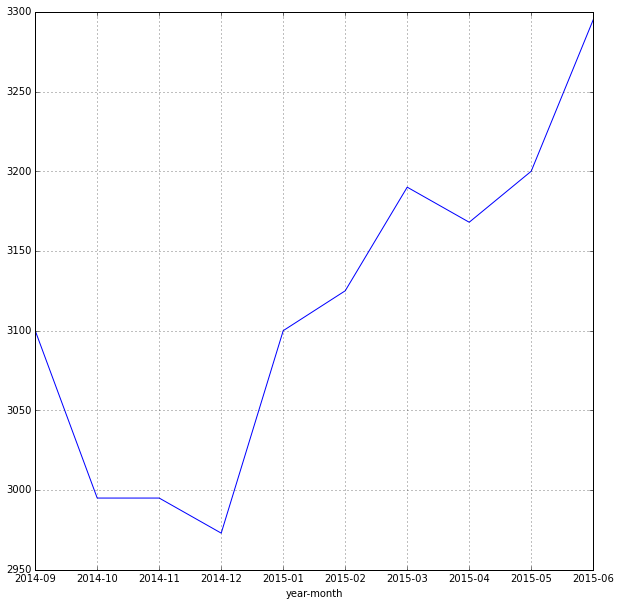

In [365]:
plt.figure(figsize=(10,10))
df_grouped_median['price'].plot()

In [368]:
from geopy.distance import vincenty

In [409]:
vincenty((sfdf.lat[0], sfdf.long[0]), (sfdf.lat[1], sfdf.long[1])).meters

714.8399798017355

In [375]:
dfcopy = sfdf.copy()

In [380]:
dfcopy.ix[0]

neighborhood                                    SOMA / south beach
baths                                                            2
beds                                                             2
body             \n Millennium Towers is the Pinnacle of Luxury...
date                                           2014-09-29 05:51:39
heading          MILLENNIUM Grand Residence w beautiful views o...
id                                                    1.418065e+09
lat                                                       37.78067
long                                                     -122.3881
parking                                                          0
price                                                        12500
region                                                         sfc
washer_dryer                                                     1
price_1bd_med                                                 3505
year-month                                                 201

In [37]:
geolocator = Nominatim()


In [38]:
location = geolocator.geocode('770 Pine St, San Francisco, 94108')

In [56]:
x, y = location.latitude, location.longitude

In [8]:
sql_df = sfdf[['id', 'beds', 'baths', 'lat', 'long', 'price']]

In [10]:
sql_df.to_csv('data/sql_df.csv', index=False, encoding='utf-8')

In [13]:
dfcopy = sfdf.copy()

In [118]:
kd_df = sql_df[['baths', 'beds', 'lat', 'long']]

In [119]:
kdvals = kd_df.values

In [124]:
kd = KDTree(kdvals, leafsize = 30000)

In [125]:
fifty_nearest = kd.query(kdvals, k=50)

In [153]:
fifty_nearest[1][3]

array([   3,   92,  141,  243,  306,  389,  434,  438,  486,  511,  554,
        575,  581,  661,  690,  710,  792, 1018, 1114, 1190, 1342, 1376,
       1477, 1521, 1577, 1618, 1659, 1716, 1752, 2018, 2076, 2216, 2268,
       2278, 3058, 3188, 3837, 3885, 4131, 4428, 4846, 4985, 5054, 5107,
       5150, 5465, 5624, 5627, 5628, 5639])

In [147]:
sfdf.price[fifty_nearest[1][1][1:11]].median()

3400.0

In [145]:
sfdf.iloc[1]

neighborhood                                    SOMA / south beach
baths                                                            1
beds                                                             1
body             \n Property Address:\n400 Beale Street, Unit #...
date                                           2014-09-29 06:32:29
heading              Rincon Hill Highrise with Outdoor Patio Space
id                                                    1.418121e+09
lat                                                       37.78678
long                                                     -122.3907
parking                                                          4
price                                                         3500
region                                                         sfc
washer_dryer                                                     1
price_1bd_med                                                 3515
year-month                                                 201

In [165]:
sfdf.price[kd.query_ball_point([2,4,x,y], .01)].median()

8475.0

In [169]:
kd.query_ball_point([2,4,x,y], .02)

[385,
 767,
 1089,
 5049,
 21796,
 21969,
 29501,
 29530,
 29586,
 30165,
 30190,
 30255,
 30266,
 30354,
 30629,
 30688,
 30839,
 30881,
 36415,
 41168,
 43023,
 43070,
 43071,
 43231,
 43458,
 43476,
 43533,
 48788,
 51888,
 52036,
 52148,
 52286,
 52888,
 52939,
 52989,
 53184,
 53279,
 53356,
 53370,
 53617,
 53932,
 54105,
 54173,
 54394,
 54433,
 57758,
 57939,
 58035,
 58247,
 67347,
 67472,
 67494,
 67587,
 67740,
 67869,
 68224,
 69295]

In [114]:
hundred_nearest[1][0]

array([10324, 10327, 10328, 10338, 10355, 10368, 10371, 10381, 10401,
       10402, 10424, 10426, 10458, 10459, 10463, 10478, 10484, 10489,
       10497, 10503, 10508, 10513, 10520, 10525, 10536, 10538, 10544,
       10560, 10561, 10572, 10577, 10585, 10586, 10589, 10591, 10592,
       10593, 10601, 10602, 10610, 10616, 10617, 10621, 10626, 10631,
       10636, 10644, 10645, 10648, 10661, 10662, 10688, 10713, 10716,
       10720, 10721, 10739, 10743, 10744, 10754, 10759, 10762, 10769,
       10770, 10774, 10786, 10793, 10830, 10838, 10861, 10870, 10875,
       10888, 10894, 10908, 10912, 10914, 10925, 10934, 10935, 10938,
       10940, 10959, 10974, 10977, 10978, 10984, 10989, 11020, 11024,
       11030, 11045, 11048, 11050, 11057, 11058, 11077, 11078, 11098, 11102])

In [180]:
from sklearn import neighbors

In [184]:
import cPickle

In [182]:
kd_sklearn = neighbors.KDTree(kdvals, leaf_size = 30000)

In [185]:
cPickle.dump(kd_sklearn, open('kd_tree.pkl', 'wb'))

In [186]:
kd_file = open('kd_tree.pkl', 'rb')
kd_sklearn = cPickle.load(kd_file)

In [211]:
twenty_nearest = kd_sklearn.query(kdvals, k=21)

In [242]:
listing_neighbors = twenty_nearest[1][500]

In [243]:
sub_df = sfdf[(sfdf.index.isin(listing_neighbors))]

In [244]:
listing_neighbors


array([19250,  3880, 19167,  4284, 18967,  4186,   349,   500,   432,
       21614,  3613,  4698,     2, 10261, 11120, 10565, 10471, 10352,
       49005, 19303,  4049])

In [250]:
listing_neighbors = [item for item in listing_neighbors if item in sub_df.index]

In [254]:
sub_df.price[listing_neighbors][:4].median()

3190.0

In [248]:
sub_df.index

Int64Index([2, 349, 432, 500, 3613], dtype='int64')

In [247]:
sub_df =sub_df.head()

In [223]:
med_df = median_neighbors(sfdf, 5)

RMSE is  858.585828498


In [235]:
from models import alt_median_neighbors

In [255]:
alt_median_neighbors(sfdf, 5)

RMSE is  719.92879914


,neighborhood,baths,beds,body,date,heading,id,lat,long,parking,price,region,washer_dryer,price_1bd_med,year-month,med_neighbor_price
0,SOMA / south beach,2,2,\n Millennium Towers is the Pinnacle of Luxury...,2014-09-29 05:51:39,MILLENNIUM Grand Residence w beautiful views o...,1418064527,37.780670,-122.388140,0,12500,sfc,1,3515,2014-09,5200.0
1,SOMA / south beach,1,1,"\n Property Address:\n400 Beale Street, Unit #...",2014-09-29 06:32:29,Rincon Hill Highrise with Outdoor Patio Space,1418120828,37.786776,-122.390721,4,3500,sfc,1,3515,2014-09,3300.0
2,SOMA / south beach,1,0,\n Open House Sunday 3:00-3:20\nJust Renovated...,2014-09-29 14:22:43,Just Renovated. Small Studio. Across St from T...,1418876409,37.776789,-122.415409,1,1625,sfc,0,3515,2014-09,1835.0
3,SOMA / south beach,2,2,\n Contact info: Mark Anthony Venegas | SF Dre...,2014-09-29 15:05:16,Ready Today 09.29.14- Gorgeous 2BD/2BA Valet...,1419012743,37.791153,-122.395813,0,6950,sfc,1,3515,2014-09,8295.0
4,SOMA / south beach,2,2,\n The Infinity! Spectacular City Views from t...,2014-09-29 15:45:57,The Infinity 301 Main St. 18H City View - Spin...,1419196022,37.789369,-122.391858,0,5700,sfc,0,3515,2014-09,5200.0
5,SOMA / south beach,1,1,"\n 1 bed, 1 bath - FURNISHED Condo @ Arterra -...",2014-09-29 15:46:23,"1 bed, 1 bath - FURNISHED Condo Arterra - Prk...",1419237475,37.774031,-122.395577,4,3750,sfc,1,3515,2014-09,3490.0
6,SOMA / south beach,1,1,\n Dogpatch LIVE/WORK LOFT - Direct Street Acc...,2014-09-29 15:49:54,Dogpatch LIVE/WORK LOFT - Direct Street Access...,1419159386,37.752481,-122.390666,4,3450,sfc,1,3515,2014-09,3450.0
7,SOMA / south beach,1,1,"\n 1 Bed, 1.5 Bath - LIVE/WORK LOFT + 1 Car Pr...",2014-09-29 16:00:05,"1 Bed, 1.5 Bath - LIVE/WORK LOFT 1 Car Prkg ...",1419199508,37.780670,-122.388140,4,3950,sfc,1,3515,2014-09,3725.0
8,SOMA / south beach,2,2,"\n 2 Bed, 2 Bath - Luxury SoMa Condo @ 140 Sou...",2014-09-29 16:02:47,"2 Bed, 2 Bath - Luxury SoMa Condo 140 South V...",1419533595,37.772449,-122.418425,4,3895,sfc,1,3515,2014-09,4000.0
9,SOMA / south beach,2,2,\n Chic Mission Bay 2BR/2BA Condo w/Balcony! P...,2014-09-29 16:06:22,Chic Mission Bay 2BR/2BA Condo w/Balcony Pet O...,1419284474,37.780670,-122.388140,4,4500,sfc,1,3515,2014-09,5200.0
